# T Gate

This program simulates T Gate \
Author: Ema Žánová \
Time: 08.12.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

## 1. Introduction 
In Qiskit, the **T gate** is a single-qubit quantum gate that applies a π/4 (45°) phase shift to the \(|1>\) state:  

$$
Y = \begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{bmatrix}
$$

It’s also called the **π/8 gate** because it rotates around the Z-axis of the Bloch sphere by π/4 radians. It’s important for building universal quantum circuits, especially in fault-tolerant quantum computing.




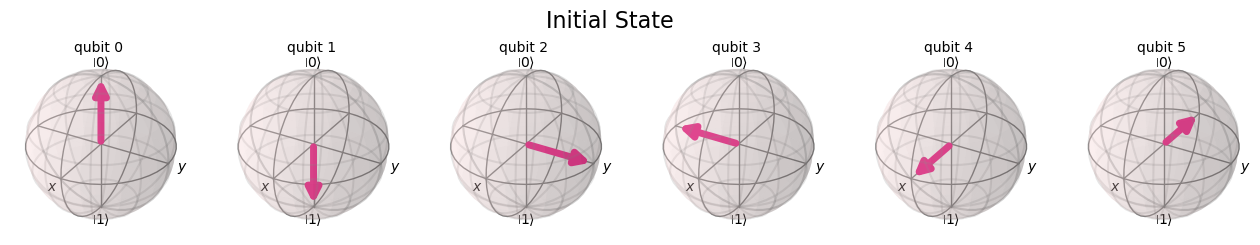

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# the 0th qubit is set to |0> automatically

circuit.x(qreg_q[1])  # Apply X gate to qubit 1 - set state to |1>

circuit.h(qreg_q[2])  # Apply Hadamard gate to qubit 2 - set to superposition state |+>
circuit.s(qreg_q[2])  # Apply S gate to qubit 2 - set to state |i>

circuit.h(qreg_q[3])  # Apply Hadamard gate to qubit 3 - set to superposition state |+>
circuit.sdg(qreg_q[3])  # Apply S-dagger gate to qubit 3 - step to state |-i>

circuit.h(qreg_q[4])  # Apply Hadamard gate to qubit 4 - set to superposition state |+>
# Apply X and Hadamard gate to qubit 5 - set to superposition state |+>
circuit.x(qreg_q[5])
circuit.h(qreg_q[5])

circuit.barrier()



plot_bloch_multivector(Statevector(circuit), title="Initial State")